In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
archivo = 'csv_creados/df_infl_tva.csv'
df = pd.read_csv(archivo)
df.head(2)

,Año,Divisa,M0_gr,M1_gr,M2_gr,M3_gr,GDP_gr,Inflation Rate,GDP_Real_gr,Velocity M0_gr,Velocity M1_gr,Velocity M2_gr,Velocity M3_gr
0,1961-12-31,Pesos,-0.015452,0.109421,0.121229,0.140866,0.268410,0.203107,0.054278,0.288317,0.143308,0.131267,0.111796
1,1962-12-31,Pesos,0.080916,0.008348,0.034162,0.043666,0.277738,0.288718,-0.008520,0.182088,0.267160,0.235530,0.224279


In [113]:
df.columns

Index(['Año', 'Divisa', 'M0_gr', 'M1_gr', 'M2_gr', 'M3_gr', 'GDP_gr',
       'Inflation Rate', 'GDP_Real_gr', 'Velocity M0_gr', 'Velocity M1_gr',
       'Velocity M2_gr', 'Velocity M3_gr'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año             63 non-null     object 
 1   Divisa          63 non-null     object 
 2   M0_gr           63 non-null     float64
 3   M1_gr           63 non-null     float64
 4   M2_gr           63 non-null     float64
 5   M3_gr           63 non-null     float64
 6   GDP_gr          63 non-null     float64
 7   Inflation Rate  63 non-null     float64
 8   GDP_Real_gr     63 non-null     float64
 9   Velocity M0_gr  63 non-null     float64
 10  Velocity M1_gr  63 non-null     float64
 11  Velocity M2_gr  63 non-null     float64
 12  Velocity M3_gr  63 non-null     float64
dtypes: float64(11), object(2)
memory usage: 6.5+ KB


In [115]:
df['Año'] = pd.to_datetime(df['Año'])

In [116]:
df.isnull().sum()

Año               0
Divisa            0
M0_gr             0
M1_gr             0
M2_gr             0
M3_gr             0
GDP_gr            0
Inflation Rate    0
GDP_Real_gr       0
Velocity M0_gr    0
Velocity M1_gr    0
Velocity M2_gr    0
Velocity M3_gr    0
dtype: int64

In [117]:
df.describe()

,Año,M0_gr,M1_gr,M2_gr,M3_gr,GDP_gr,Inflation Rate,GDP_Real_gr,Velocity M0_gr,Velocity M1_gr,Velocity M2_gr,Velocity M3_gr
count,63,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1992-12-30 14:51:25.714285696,1.782153,1.638148,1.596230,1.468030,1.591292,1.604749,0.023335,0.043457,0.023363,0.007066,0.007725
min,1961-12-31 00:00:00,-0.204126,-0.148544,-0.052649,-0.212762,-0.054563,-0.035611,-0.108945,-0.653619,-0.346253,-0.271572,-0.296663
25%,1977-07-01 12:00:00,0.173262,0.210428,0.218727,0.229544,0.201713,0.151588,-0.020096,-0.069657,-0.064810,-0.086536,-0.096405
50%,1992-12-31 00:00:00,0.378741,0.333126,0.386772,0.375375,0.331365,0.288718,0.028118,0.015656,0.017019,-0.013734,-0.020486
75%,2008-07-01 00:00:00,0.899111,0.967947,1.016798,1.011737,0.966935,1.005334,0.065438,0.174489,0.086945,0.082141,0.045316
max,2023-12-31 00:00:00,51.692238,43.679800,37.395430,32.045143,28.209270,30.460912,0.107180,1.166374,1.180825,0.677537,1.496669
std,NaN,6.607533,5.630695,4.952092,4.191392,4.390996,4.660917,0.054967,0.251327,0.199118,0.153119,0.221963


Mostramos la distribucion de nuestra varaible objetivo

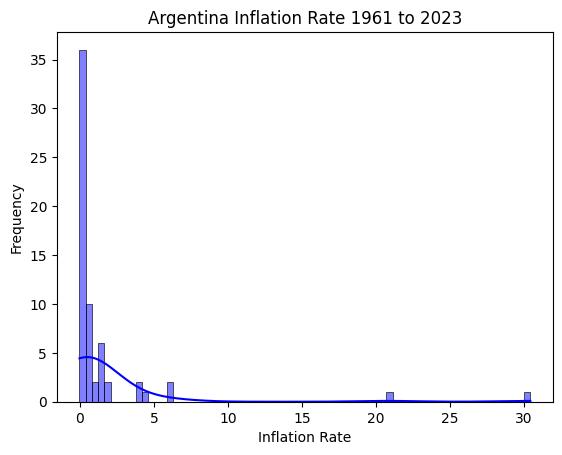

In [118]:
sns.histplot(df['Inflation Rate'], kde=True, color='blue')
plt.title('Argentina Inflation Rate 1961 to 2023')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')
plt.show()

In [119]:
IQR_Inflation_Rate = df['Inflation Rate'].quantile(0.75) - df['Inflation Rate'].quantile(0.25)
IQR_Inflation_Rate

0.8537460829871155

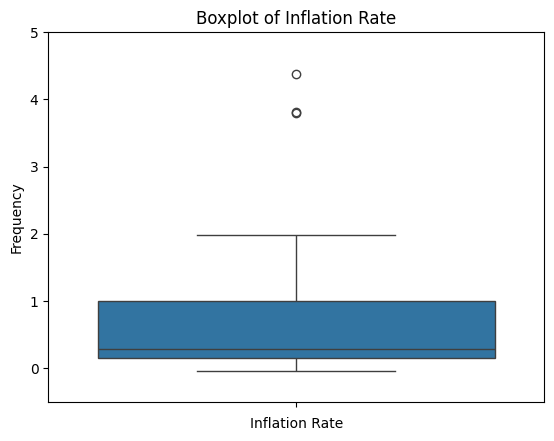

In [120]:
sns.boxplot(df['Inflation Rate'])
plt.title('Boxplot of Inflation Rate')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')
plt.ylim(-0.5, 5)
plt.show()

Manejamos los outliers de momento

In [121]:
df1 = df.copy()

upper_bond = 3*IQR_Inflation_Rate + df1['Inflation Rate'].quantile(0.75)
lower_bond = df1['Inflation Rate'].quantile(0.25) - 3*IQR_Inflation_Rate

df2 = df1[(df1['Inflation Rate'] <= upper_bond) & (df1['Inflation Rate'] >= lower_bond)]

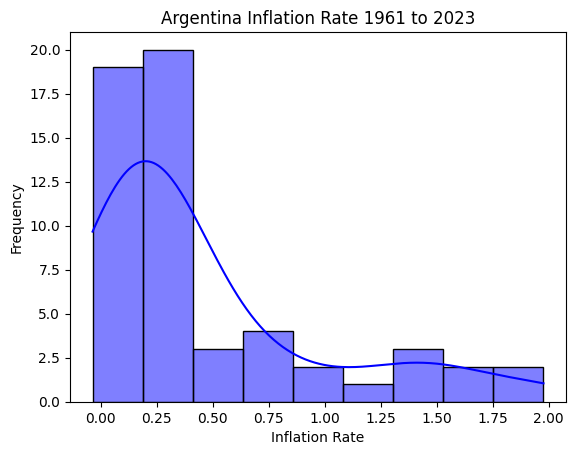

In [122]:
sns.histplot(df2['Inflation Rate'], kde=True, color='blue')
plt.title('Argentina Inflation Rate 1961 to 2023')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')
plt.show()

Replicamos para los agregados monetarios

In [123]:
m_aggregates = ['M0_gr', 'M1_gr', 'M2_gr', 'M3_gr']

for m in m_aggregates:
    q75 = df2[m].quantile(0.75)
    q25 = df2[m].quantile(0.25)
    iqr = q75 - q25

    
    upper_bond = 3 * iqr + q75
    lower_bond = q25 - 3 * iqr

    df3 = df2[(df2[m] <= upper_bond) & (df2[m] >= lower_bond)]


In [124]:
df3.to_csv('csv_creados/df_tva_normalized.csv',index=False)

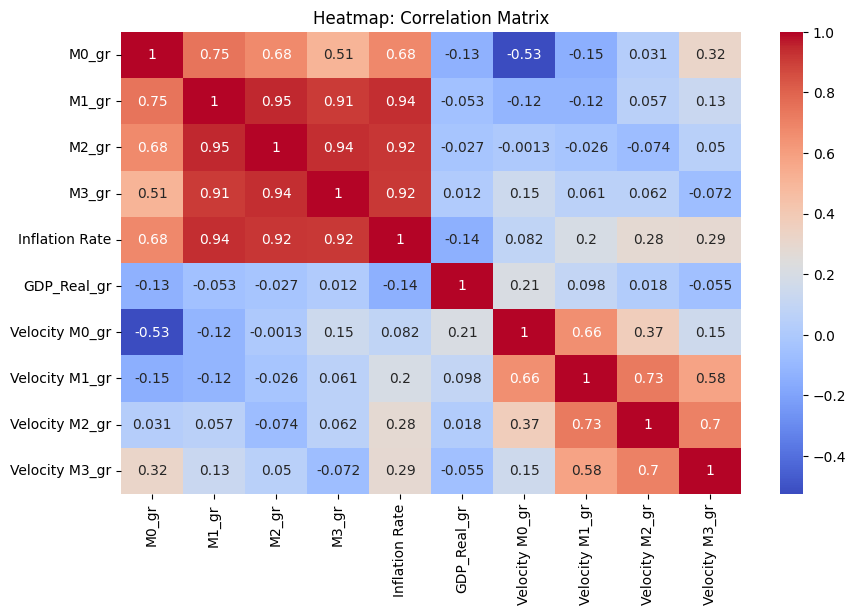

In [125]:
n_columns = ['M0_gr', 'M1_gr', 'M2_gr', 'M3_gr',
       'Inflation Rate', 'GDP_Real_gr', 'Velocity M0_gr', 'Velocity M1_gr',
       'Velocity M2_gr', 'Velocity M3_gr']
correlation_matrix = df3[n_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()

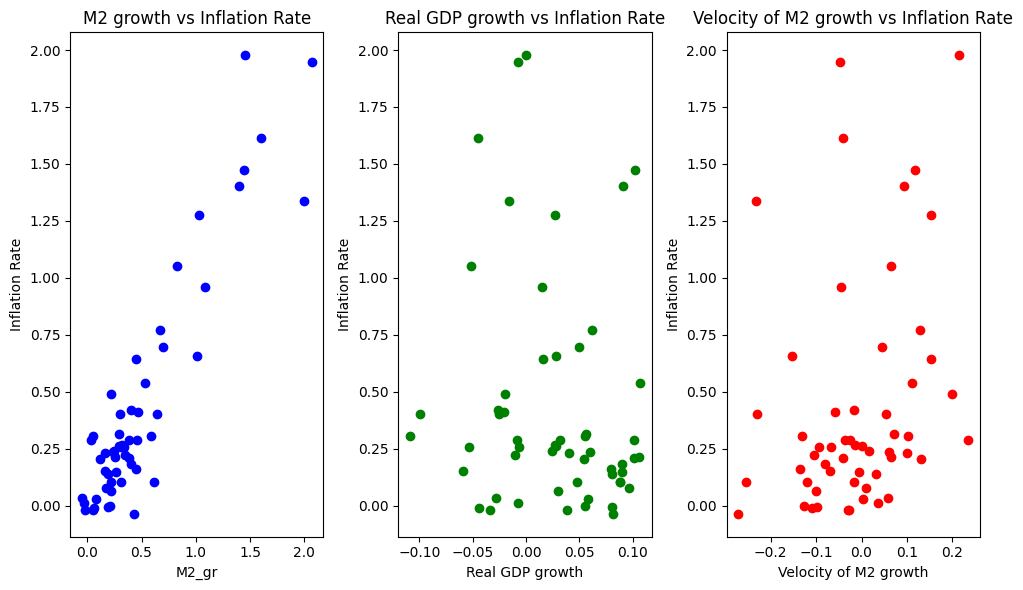

In [126]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Primer gráfico: M2 growth vs Inflation Rate
axs[0].scatter(df3['M2_gr'], df3['Inflation Rate'], color='blue')
axs[0].set_xlabel('M2_gr')
axs[0].set_ylabel('Inflation Rate')
axs[0].set_title('M2 growth vs Inflation Rate')

# Segundo gráfico: GDP real vs Inflation Rate
axs[1].scatter(df3['GDP_Real_gr'], df3['Inflation Rate'], color='green')
axs[1].set_xlabel('Real GDP growth')
axs[1].set_ylabel('Inflation Rate')
axs[1].set_title('Real GDP growth vs Inflation Rate')

# Tercer gráfico: Velocity of M2 vs Inflation Rate
axs[2].scatter(df3['Velocity M2_gr'], df3['Inflation Rate'], color='red')
axs[2].set_xlabel('Velocity of M2 growth')
axs[2].set_ylabel('Inflation Rate')
axs[2].set_title('Velocity of M2 growth vs Inflation Rate')


plt.tight_layout()
plt.show()


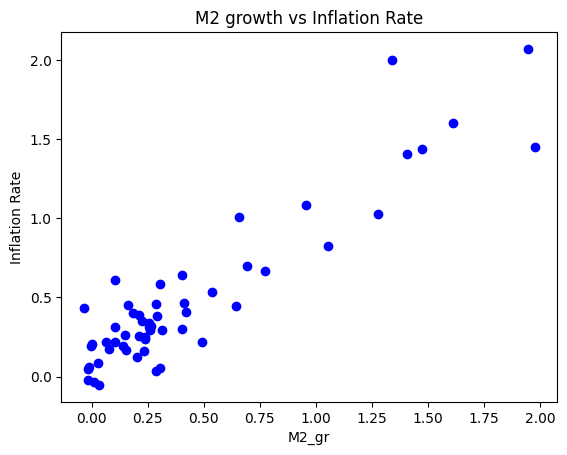

In [127]:
plt.scatter(df3['Inflation Rate'], df3['M2_gr'], color = 'blue')
plt.xlabel('M2_gr')
plt.ylabel('Inflation Rate')
plt.title('M2 growth vs Inflation Rate')
plt.show()

In [128]:
x = df3[['M2_gr', 'GDP_Real_gr', 'Velocity M2_gr']]
y = df3['Inflation Rate']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [130]:
print("Lenght of Train", len(X_train))
print("Lenght of Test", len(X_test))

Lenght of Train 44
Lenght of Test 11


In [131]:
X_train_sm = sm.add_constant(X_train)
y_train = y_train.astype(float)
X_train_sm = X_train_sm.astype(float)

model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Inflation Rate   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     780.5
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.63e-35
Time:                        17:29:50   Log-Likelihood:                 58.450
No. Observations:                  44   AIC:                            -108.9
Df Residuals:                      40   BIC:                            -101.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0065      0.016      0.

In [132]:
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

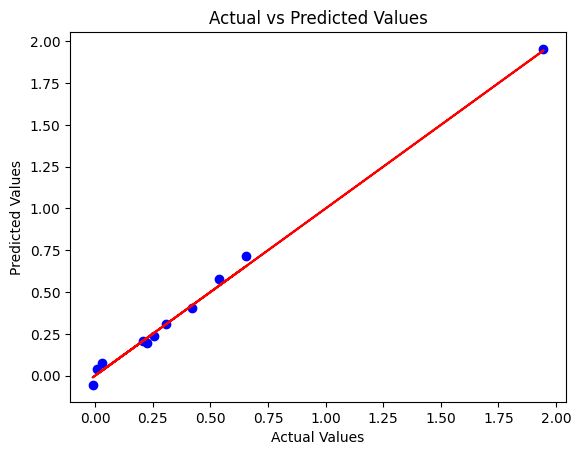

In [133]:
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot(y_test, y_test, 'red')
plt.show()

In [134]:
mean_residuals = np.mean(model.resid)
np.round(mean_residuals,2)

-0.0

In [135]:
for column in X_train.columns:
    correlation = np.corrcoef(X_train[column], model.resid)[0,1]
    print(f'Correlaton between {column} and residuals: {np.round(correlation,2)}')

Correlaton between M2_gr and residuals: -0.0
Correlaton between GDP_Real_gr and residuals: -0.0
Correlaton between Velocity M2_gr and residuals: 0.0


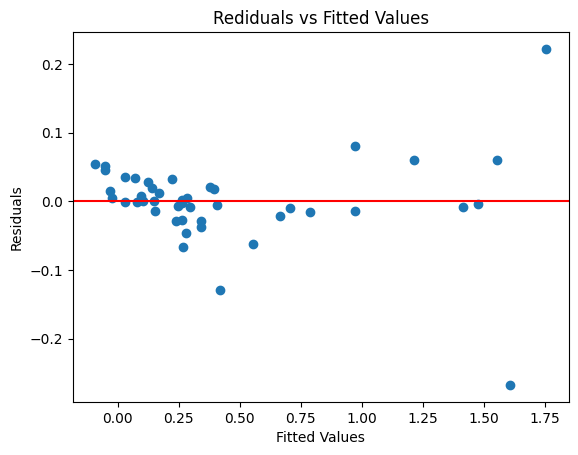

In [136]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color = 'red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Rediduals vs Fitted Values')
plt.show()

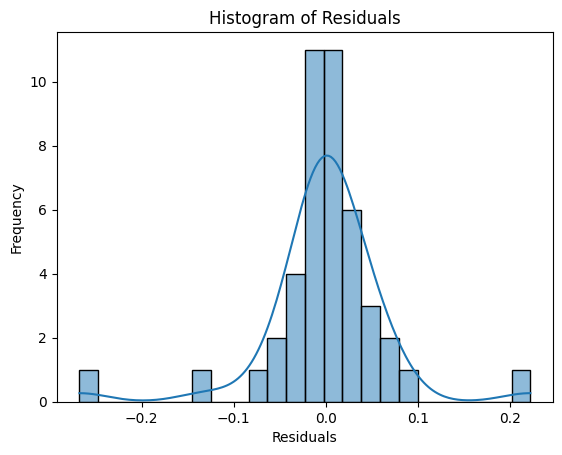

In [137]:
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Prueba de normalidad de los residuos

In [138]:
from scipy import stats

# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(model.resid)
print(f'Shapiro-Wilk Test: Stat={stat:.3f}, p-value={p_value:.3f}')

Shapiro-Wilk Test: Stat=0.800, p-value=0.000


Los residuos no se distribuyen normalmente, lo cual es uno de los requsitios que debe cumplir un buen modelo OLS (minimos cuadrados ordinarios). Por lo tanto, dado sus caracteristicas, y su aparente linealidad, vamos a probar con un modelo de regresión robusta, el cual no necesita que los residuos se distribuyan normalmente

In [139]:
X_0 = df3[['M2_gr', 'GDP_Real_gr', 'Velocity M2_gr']]
Y = df3['Inflation Rate']

X = sm.add_constant(X_0)

model_robust = sm.RLM(Y, X).fit()


y_pred_r = model_robust.fittedvalues


y_mean = np.mean(Y)
SST = np.sum((Y - y_mean) ** 2)
SSR = np.sum((Y - y_pred_r) ** 2)
R_squared = 1 - (SSR / SST)
print(f'R² (Coeficiente de Determinación): {R_squared:.4f}')

print(model_robust.summary())

R² (Coeficiente de Determinación): 0.9844
                    Robust linear Model Regression Results                    
Dep. Variable:         Inflation Rate   No. Observations:                   55
Model:                            RLM   Df Residuals:                       51
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 24 Jul 2024                                         
Time:                        17:29:51                                         
No. Iterations:                    30                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
co

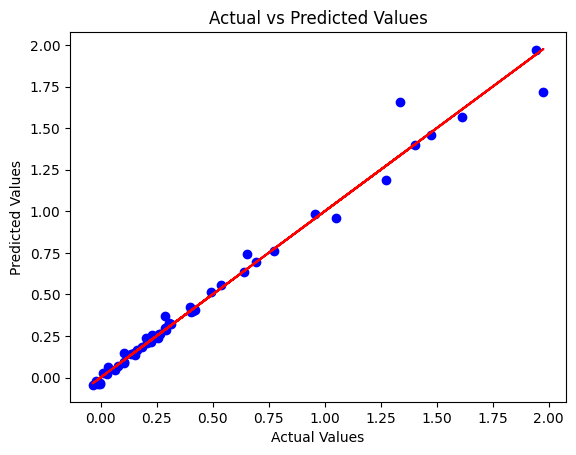

In [140]:
plt.scatter(Y, y_pred_r, color = 'blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot(Y, Y, 'red')
plt.show()

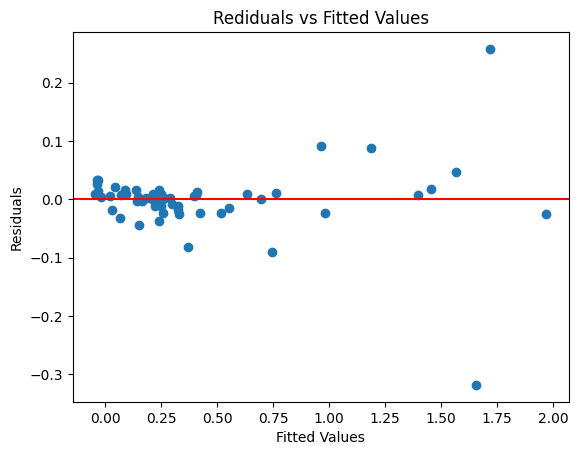

In [141]:
plt.scatter(y_pred_r, model_robust.resid)
plt.axhline(y=0, color = 'red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Rediduals vs Fitted Values')
plt.show()

Los residuos se distrbuyen aleatoriamente

In [142]:
for column in X_0.columns:
    correlation = np.corrcoef(X_0[column], model_robust.resid)[0,1]
    print(f'Correlaton between {column} and residuals: {np.round(correlation,2)}')

Correlaton between M2_gr and residuals: -0.09
Correlaton between GDP_Real_gr and residuals: 0.01
Correlaton between Velocity M2_gr and residuals: 0.32


Medimos la multicolinealidad

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supongamos que df2 es tu DataFrame original con las variables.
# Eliminar la constante si ya fue agregada para evitar problemas al calcular el VIF
X_vif = X_0.values

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_0.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]

print(vif_data)


         Variable       VIF
0           M2_gr  1.115593
1     GDP_Real_gr  1.102487
2  Velocity M2_gr  1.012522


VIF < 5. No tenemos problemas de colinealidad

In [144]:
from sklearn.model_selection import KFold
from statsmodels.robust.robust_linear_model import RLM
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Definir la función para ajustar el modelo y calcular el MSE
def cross_val_score_robust(X, Y, cv):
    scores = []
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Ajustar el modelo robusto
        model1 = RLM(y_train, X_train, M=sm.robust.norms.HuberT())
        results = model1.fit()
        
        # Predecir en el conjunto de prueba
        y_pred2 = results.predict(X_test)
        
        # Calcular el error cuadrático medio
        mse = mean_squared_error(y_test, y_pred2)
        scores.append(mse)
    
    return np.mean(scores), np.std(scores)

# Ejecutar la validación cruzada
cv = 5  # Número de particiones para K-Fold
mean_mse, std_mse = cross_val_score_robust(X, Y, cv)

print(f'Mean MSE: {mean_mse:.3f}')
print(f'Standard Deviation of MSE: {std_mse:.3f}')

Mean MSE: 0.004
Standard Deviation of MSE: 0.004


Los resultados de la validación cruzada indican el modelo de regresión robusta tiene un rendimiento muy bueno en términos de error cuadrático medio (MSE). La validación cruzada confirma que el modelo no está sobreajustado (overfitting) y que su rendimiento no varía significativamente entre diferentes conjuntos de datos.

In [145]:
print("Coeficientes del Modelo:")
print(model_robust.params)

print("\np-valor de los Coeficientes:")
print(model_robust.pvalues)

Coeficientes del Modelo:
const             0.002151
M2_gr             0.979206
GDP_Real_gr      -1.154316
Velocity M2_gr    1.381917
dtype: float64

p-valor de los Coeficientes:
const             6.742349e-01
M2_gr             0.000000e+00
GDP_Real_gr       6.850194e-78
Velocity M2_gr    0.000000e+00
dtype: float64


In [146]:
df3.describe()

,Año,M0_gr,M1_gr,M2_gr,M3_gr,GDP_gr,Inflation Rate,GDP_Real_gr,Velocity M0_gr,Velocity M1_gr,Velocity M2_gr,Velocity M3_gr
count,55,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1994-02-28 14:50:10.909090944,0.543876,0.477883,0.491724,0.503207,0.473566,0.437766,0.027651,0.023302,0.001453,-0.009400,-0.017084
min,1961-12-31 00:00:00,-0.204126,-0.148544,-0.052649,-0.212762,-0.054563,-0.035611,-0.108945,-0.653619,-0.277673,-0.271572,-0.296663
25%,1975-07-01 12:00:00,0.130640,0.199499,0.200795,0.203530,0.185772,0.121184,-0.012885,-0.058383,-0.064810,-0.086536,-0.087505
50%,1996-12-31 00:00:00,0.347147,0.294876,0.318479,0.322993,0.290511,0.256035,0.030456,0.015362,0.014819,-0.015749,-0.020817
75%,2010-07-01 12:00:00,0.471333,0.599278,0.598407,0.608554,0.565649,0.515180,0.079922,0.157199,0.073126,0.065015,0.038258
max,2023-12-31 00:00:00,7.440656,2.159801,2.068736,1.845502,1.976128,1.976974,0.107180,0.473008,0.267160,0.235530,0.266950
std,NaN,1.046763,0.495433,0.491098,0.481564,0.509274,0.505382,0.055056,0.196457,0.114978,0.115266,0.115709


Modelo VAR

In [190]:
from statsmodels.tsa.stattools import adfuller

df_selected = df[['M2_gr', 'Inflation Rate']]

# Función para aplicar la prueba ADF
def test_stationarity(series):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'{series.name} - ADF Statistic: {result[0]}')
    print(f'{series.name} - p-value: {result[1]}')
    print('Critical Values:', result[4])
    if result[1] < 0.05:
        print(f'{series.name} es estacionaria')
    else:
        print(f'{series.name} NO es estacionaria')

# Prueba de estacionariedad
test_stationarity(df_selected['M2_gr'])
test_stationarity(df_selected['Inflation Rate'])


M2_gr - ADF Statistic: -5.407861059314263
M2_gr - p-value: 3.2607816175336006e-06
Critical Values: {'1%': -3.540522678829176, '5%': -2.9094272025108254, '10%': -2.5923136524453696}
M2_gr es estacionaria
Inflation Rate - ADF Statistic: -5.134560407080605
Inflation Rate - p-value: 1.1940906674115007e-05
Critical Values: {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}
Inflation Rate es estacionaria


Las series de inflación y M2_gr son estacionarias

In [191]:
from statsmodels.tsa.api import VAR

# Ajustar el modelo VAR con los datos estacionarios
model = VAR(df_selected)
lag_order = model.select_order()
print(lag_order.summary())

# Ajuste del modelo VAR con el número óptimo de lags
results = model.fit(lag_order.aic)
print(results.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        4.284       4.359       72.50       4.312
1        1.921      2.146*       6.829       2.007
2        1.848       2.224       6.358       1.992
3        1.837       2.363       6.301       2.039
4       1.555*       2.230      4.768*      1.814*
5        1.651       2.476       5.280       1.967
6        1.721       2.696       5.712       2.095
7        1.856       2.981       6.615       2.287
8        1.880       3.156       6.888       2.369
9        1.965       3.391       7.660       2.512
10       1.826       3.402       6.842       2.430
11       1.881       3.607       7.478       2.543
--------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 24, Jul, 2024
Time:                     18:00:11
---------

In [192]:
from statsmodels.tsa.api import VAR

# Ajustar el modelo VAR con 4 lags
model = VAR(df_selected)
results = model.fit(4)

# Resumen del modelo ajustado
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 24, Jul, 2024
Time:                     18:00:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.87772
Nobs:                     59.0000    HQIC:                   1.49132
Log likelihood:          -186.130    FPE:                    3.48580
AIC:                      1.24390    Det(Omega_mle):         2.62415
--------------------------------------------------------------------
Results for equation M2_gr
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.661465         0.624083            1.060           0.289
L1.M2_gr                 -0.923768         1.117144           -0.827           0.408
L1.Inflation Rate         1.584225         1

In [193]:
# Obtener el análisis de impulso-respuesta para 10 períodos
irf = results.irf(10)

# Extraer la matriz de impulso-respuesta
irf_values = irf.orth_irfs

irf_values.shape

(11, 2, 2)

In [194]:
# Suponiendo que irf_values tiene la forma (n_periodos, n_variables, n_choques)
n_periodos, n_variables, n_choques = irf_values.shape

# Crear una lista para almacenar los resultados
data = []

# Nombres de las columnas
column_names = [f'{var}_shock_{j}' for var in df_selected.columns for j in range(n_choques)]

# Reorganizar los datos en el formato adecuado
for t in range(n_periodos):
    row = [f'Period {t}']  # Periodo actual
    for j in range(n_choques):
        row.extend(irf_values[t, :, j])  # Respuestas para todos los choques en el período t
    data.append(row)

# Convertir a DataFrame
irf_df = pd.DataFrame(data, columns=['Period'] + column_names)


       Period  Inflation Rate_shock_0
0    Period 0                0.000000
1    Period 1                0.632237
2    Period 2                1.178800
3    Period 3               -1.952002
4    Period 4               -1.774624
5    Period 5                0.121444
6    Period 6                0.488361
7    Period 7               -0.287089
8    Period 8               -0.301283
9    Period 9               -0.040808
10  Period 10               -0.094045


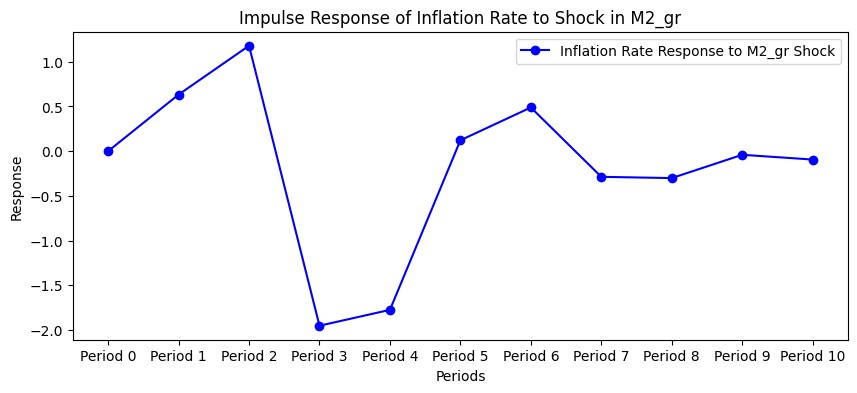

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que irf_df es el DataFrame que contiene todos los efectos de impulso-respuesta

# Filtrar columnas específicas: respuestas de Inflation Rate a choques en M2_gr
inflation_response_to_m2_gr = irf_df[['Period', 'Inflation Rate_shock_0']]

# Mostrar el DataFrame filtrado
print(inflation_response_to_m2_gr)

# Graficar la respuesta de Inflation Rate a choques en M2_gr
plt.figure(figsize=(10, 4))
plt.plot(inflation_response_to_m2_gr['Period'], inflation_response_to_m2_gr['Inflation Rate_shock_0'], marker='o', color='b', label='Inflation Rate Response to M2_gr Shock')
plt.title('Impulse Response of Inflation Rate to Shock in M2_gr')
plt.xlabel('Periods')
plt.ylabel('Response')
plt.legend()
plt.show()
